In [59]:
from binance.client import Client
import pandas as pd

In [60]:
client=Client('API_TOKEN','SECRET_API_KEY')

In [61]:
client.get_account()

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'updateTime': 1667960378884,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.00000036', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00000348', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.00002521', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'GAS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BCC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '0

In [62]:
pd.DataFrame(client.get_historical_klines('DOGEUSDT','5m', '30m ago UTC'))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1668402900000,0.08188000,0.08239000,0.08180000,0.08216000,3302444.00000000,1668403199999,271288.61186000,987,1621053.00000000,133217.18830000,0
1,1668403200000,0.08216000,0.08247000,0.08215000,0.08227000,7912566.00000000,1668403499999,651219.70092000,1612,4876263.00000000,401313.44729000,0
2,1668403500000,0.08226000,0.08233000,0.08180000,0.08187000,5254302.00000000,1668403799999,431207.65794000,1180,2041314.00000000,167525.93148000,0
3,1668403800000,0.08188000,0.08220000,0.08135000,0.08151000,7102916.00000000,1668404099999,581264.18445000,1496,2912499.00000000,238578.74415000,0
4,1668404100000,0.08151000,0.08159000,0.08065000,0.08111000,17007736.00000000,1668404399999,1379165.34321000,3207,6597735.00000000,535004.94358000,0
5,1668404400000,0.08111000,0.08117000,0.08065000,0.08092000,3543339.00000000,1668404699999,286642.39336000,924,1623219.00000000,131320.63842000,0


In [63]:
def getminutedata(symbol, interval, lookback):
    frame =pd.DataFrame(client.get_historical_klines(symbol, interval, lookback+' m ago UTC'))
    frame= frame.iloc[:,:6]
    frame.columns=['Time','Open','High','Low','Close','Volume']
    frame=frame.set_index('Time')
    frame.index=pd.to_datetime(frame.index,unit='ms')
    frame=frame.astype(float)
    return frame
    

In [64]:
test=getminutedata('DOGEUSDT','5m','30m')

In [65]:
test

,Open,High,Low,Close,Volume
Time,,,,,
2022-11-14 05:15:00,0.08188,0.08239,0.08180,0.08216,3302444.0
2022-11-14 05:20:00,0.08216,0.08247,0.08215,0.08227,7912566.0
2022-11-14 05:25:00,0.08226,0.08233,0.08180,0.08187,5254302.0
2022-11-14 05:30:00,0.08188,0.08220,0.08135,0.08151,7102916.0
2022-11-14 05:35:00,0.08151,0.08159,0.08065,0.08111,17007736.0
2022-11-14 05:40:00,0.08111,0.08117,0.08065,0.08092,3547839.0


<AxesSubplot:xlabel='Time'>

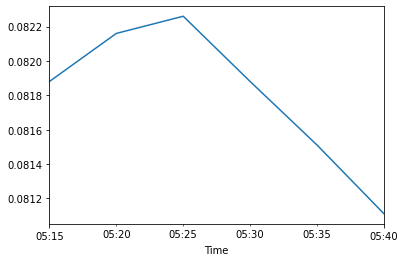

In [66]:
test.Open.plot()

In [67]:
# buy if assset fell by more than 2% within the last 10 min
# sell of asset rises by more then 5 or falls further by 5%

In [68]:
def strategytest(symbol,qty,entried=False):
    df =getminutedata(symbol,'5m','30m')
    cumulret=(df.Open.pct_change() +1).cumprod() -1
    if not entried:
        if cumulret[-1]<-0.5:
            order=client.create_order(symbol=symbol,side='BUY',type='MARKET',quantity=qty)
            print(order)
            entried=True
        else:
            print('No trade has been executed')
    if entried:
        while True:
            df=getminutedata(symbol,'5m','30m')
            sincebuy = df.loc[df.index > pd.to_datetime(order['transactTime'],unit='ms')]
            if len(sincebuy)>0:
                sincebuyret=(sincebuy.Openpct_change() +1).cumprod() -1
                if sincebuy[-1]>2 or sincebuyret[-1]<-3:
                    order=client.create_order(symbol=symbol,side='SELL',type='MARKET',quantity=qty)

                    print(order)
                    break
                

In [69]:
strategytest('DOGEUSDT',79)

No trade has been executed


In [70]:
info = client.get_account_snapshot(type='SPOT')
info

{'code': 200,
 'msg': '',
 'snapshotVos': [{'type': 'spot',
   'updateTime': 1667865599000,
   'data': {'totalAssetOfBtc': '0.00253405',
    'balances': [{'asset': '1INCH', 'free': '0', 'locked': '0'},
     {'asset': 'ADX', 'free': '0', 'locked': '0'},
     {'asset': 'ANKR', 'free': '0', 'locked': '0'},
     {'asset': 'BETA', 'free': '0', 'locked': '0'},
     {'asset': 'BNB', 'free': '0.00002521', 'locked': '0'},
     {'asset': 'BTC', 'free': '0.00000036', 'locked': '0'},
     {'asset': 'BTCST', 'free': '0', 'locked': '0'},
     {'asset': 'BUSD', 'free': '0', 'locked': '0'},
     {'asset': 'CHESS', 'free': '0', 'locked': '0'},
     {'asset': 'CLV', 'free': '0', 'locked': '0'},
     {'asset': 'DAR', 'free': '0', 'locked': '0'},
     {'asset': 'DOGE', 'free': '468.363', 'locked': '0'},
     {'asset': 'EPS', 'free': '0', 'locked': '0'},
     {'asset': 'ETH', 'free': '0.00000348', 'locked': '0'},
     {'asset': 'ETHW', 'free': '0.00000348', 'locked': '0'},
     {'asset': 'EUR', 'free': '0.

In [71]:
trades = client.get_recent_trades(symbol='DOGEUSDT')
trades


[{'id': 467249823,
  'price': '0.08079000',
  'qty': '180.00000000',
  'quoteQty': '14.54220000',
  'time': 1668404508175,
  'isBuyerMaker': True,
  'isBestMatch': True},
 {'id': 467249824,
  'price': '0.08080000',
  'qty': '5027.00000000',
  'quoteQty': '406.18160000',
  'time': 1668404508351,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 467249825,
  'price': '0.08080000',
  'qty': '5536.00000000',
  'quoteQty': '447.30880000',
  'time': 1668404508351,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 467249826,
  'price': '0.08080000',
  'qty': '2457.00000000',
  'quoteQty': '198.52560000',
  'time': 1668404508351,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 467249827,
  'price': '0.08082000',
  'qty': '11342.00000000',
  'quoteQty': '916.66044000',
  'time': 1668404508750,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 467249828,
  'price': '0.08081000',
  'qty': '600.00000000',
  'quoteQty': '48.48600000',
  'time': 1668404510628,
  'isBuye

In [75]:
import pandas as pd
klines = client.get_historical_klines("DOGEUSDT", Client.KLINE_INTERVAL_5MINUTE, "1 Nov, 2022", "Today")
df=pd.DataFrame(klines)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1667260800000,0.12685000,0.12860000,0.12561000,0.12781000,43833313.00000000,1667261099999,5570979.47330000,10702,25986771.00000000,3300769.54358000,0
1,1667261100000,0.12780000,0.12794000,0.12502000,0.12569000,30717597.00000000,1667261399999,3875019.10505000,8243,12539683.00000000,1582579.99485000,0
2,1667261400000,0.12570000,0.12611000,0.12448000,0.12576000,19559246.00000000,1667261699999,2452535.50647000,5777,10796156.00000000,1354341.03459000,0
3,1667261700000,0.12577000,0.12634000,0.12533000,0.12590000,8343759.00000000,1667261999999,1050294.79222000,2903,4428102.00000000,557290.25799000,0
4,1667262000000,0.12587000,0.12624000,0.12506000,0.12507000,8662843.00000000,1667262299999,1089129.03604000,2503,2795598.00000000,351790.77336000,0


In [76]:
    frame =pd.DataFrame(klines)
    frame= frame.iloc[:,:6]
    frame.columns=['Time','Open','High','Low','Close','Volume']
    frame=frame.set_index('Time')
    frame.index=pd.to_datetime(frame.index,unit='ms')
    frame=frame.astype(float)
    frame=frame.tz_localize(tz='UTC')
    frame=frame.tz_convert(tz='Asia/Calcutta')
    frame
    

,Open,High,Low,Close,Volume
Time,,,,,
2022-11-01 05:30:00+05:30,0.12685,0.12860,0.12561,0.12781,43833313.0
2022-11-01 05:35:00+05:30,0.12780,0.12794,0.12502,0.12569,30717597.0
2022-11-01 05:40:00+05:30,0.12570,0.12611,0.12448,0.12576,19559246.0
2022-11-01 05:45:00+05:30,0.12577,0.12634,0.12533,0.12590,8343759.0
2022-11-01 05:50:00+05:30,0.12587,0.12624,0.12506,0.12507,8662843.0
...,...,...,...,...,...
2022-11-14 10:50:00+05:30,0.08216,0.08247,0.08215,0.08227,7912566.0
2022-11-14 10:55:00+05:30,0.08226,0.08233,0.08180,0.08187,5254302.0
2022-11-14 11:00:00+05:30,0.08188,0.08220,0.08135,0.08151,7102916.0


In [77]:
frame['2022-10-13':'2022-11-14']

,Open,High,Low,Close,Volume
Time,,,,,
2022-11-01 05:30:00+05:30,0.12685,0.12860,0.12561,0.12781,43833313.0
2022-11-01 05:35:00+05:30,0.12780,0.12794,0.12502,0.12569,30717597.0
2022-11-01 05:40:00+05:30,0.12570,0.12611,0.12448,0.12576,19559246.0
2022-11-01 05:45:00+05:30,0.12577,0.12634,0.12533,0.12590,8343759.0
2022-11-01 05:50:00+05:30,0.12587,0.12624,0.12506,0.12507,8662843.0
...,...,...,...,...,...
2022-11-14 10:50:00+05:30,0.08216,0.08247,0.08215,0.08227,7912566.0
2022-11-14 10:55:00+05:30,0.08226,0.08233,0.08180,0.08187,5254302.0
2022-11-14 11:00:00+05:30,0.08188,0.08220,0.08135,0.08151,7102916.0


<AxesSubplot:xlabel='Time'>

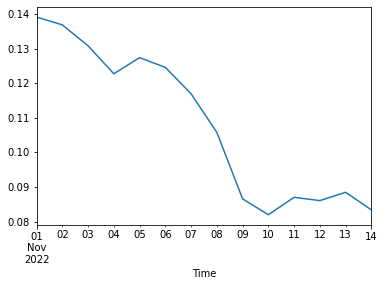

In [78]:
%matplotlib inline
frame.Close.resample('d').mean().plot() 

In [79]:
#frame=frame.tz_localize(tz='UTC')
frame=frame.tz_convert(tz='Asia/Calcutta')
frame

,Open,High,Low,Close,Volume
Time,,,,,
2022-11-01 05:30:00+05:30,0.12685,0.12860,0.12561,0.12781,43833313.0
2022-11-01 05:35:00+05:30,0.12780,0.12794,0.12502,0.12569,30717597.0
2022-11-01 05:40:00+05:30,0.12570,0.12611,0.12448,0.12576,19559246.0
2022-11-01 05:45:00+05:30,0.12577,0.12634,0.12533,0.12590,8343759.0
2022-11-01 05:50:00+05:30,0.12587,0.12624,0.12506,0.12507,8662843.0
...,...,...,...,...,...
2022-11-14 10:50:00+05:30,0.08216,0.08247,0.08215,0.08227,7912566.0
2022-11-14 10:55:00+05:30,0.08226,0.08233,0.08180,0.08187,5254302.0
2022-11-14 11:00:00+05:30,0.08188,0.08220,0.08135,0.08151,7102916.0
